In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from model import PanicModel
from agent import PanicAgent2
from tqdm.notebook import tqdm


# Experiment 1
### Vary number of agents

In [4]:
num_agents_cv = np.arange(100, 1000, 10)
max_group_size = 5
num_repetitions = 100
max_iter = 1000

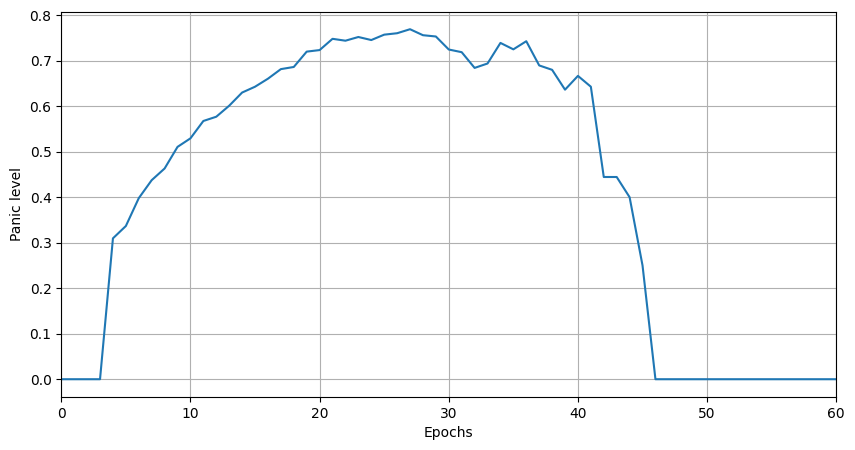

In [5]:

model_params = {
    "N": 200,
    "width": 10,
    "height": 10,
    "min_group_size": 1,
    "max_group_size": max_group_size,
    "resilience": 3,
    "min_radius": 0.5,
}

model = PanicModel(**model_params)


for j in range(num_repetitions):
    for i in range(max_iter):
        model.step()

        if not len(model.schedule.agents):
            break



model_data = model.datacollector.get_model_vars_dataframe()

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Epochs")
ax.set_ylabel("Panic level")
ax.set_xlim((0, 60))

plt.plot(model_data.panic)
plt.grid()

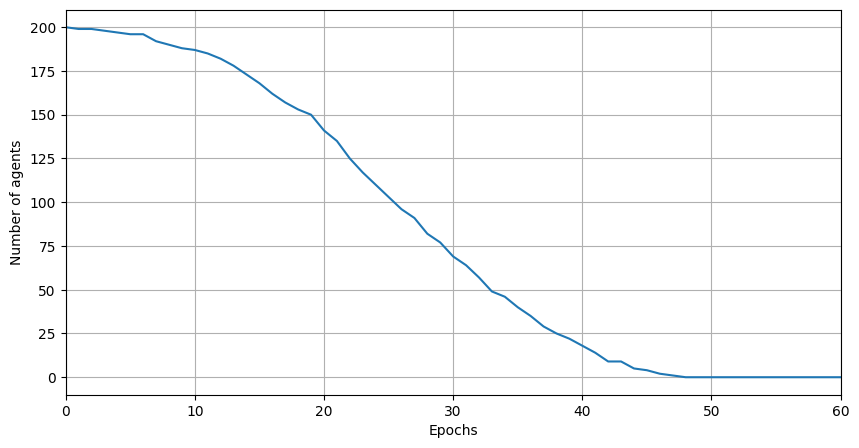

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
    
ax.set_xlabel("Epochs")
ax.set_ylabel("Number of agents")
ax.set_xlim((0, 60))

plt.plot(model_data.num_agents)
plt.grid()

In [7]:
data = {
    "panic_mean": [],
    "panic_var": [],
    "panic_max": [],
    "num_agents": [],
    "max_group_size": [],
    "mean_group_size": [],
}

for num_agents in tqdm(num_agents_cv):

    model_params = {
        "N": num_agents,
        "width": 10,
        "height": 10,
        "min_group_size": 1,
        "max_group_size": max_group_size,
        "resilience": 3,
        "min_radius": 0.5,
    }

    model = PanicModel(**model_params)


    for j in range(num_repetitions):
        for i in range(max_iter):
            model.step()

            if not len(model.schedule.agents):
                break

        # collect data
        model_data = model.datacollector.get_model_vars_dataframe()
    
        data["panic_mean"].append(model_data.panic.mean())
        data["panic_var"].append(model_data.panic.var())
        data["panic_max"].append(model_data.panic.max())
        data["num_agents"].append(num_agents)
        data["max_group_size"].append(max_group_size)
        data["mean_group_size"].append(
            np.mean([len(group) for group in model.friend_groups])
        )

  0%|          | 0/90 [00:00<?, ?it/s]

In [8]:
data = pd.DataFrame(data)

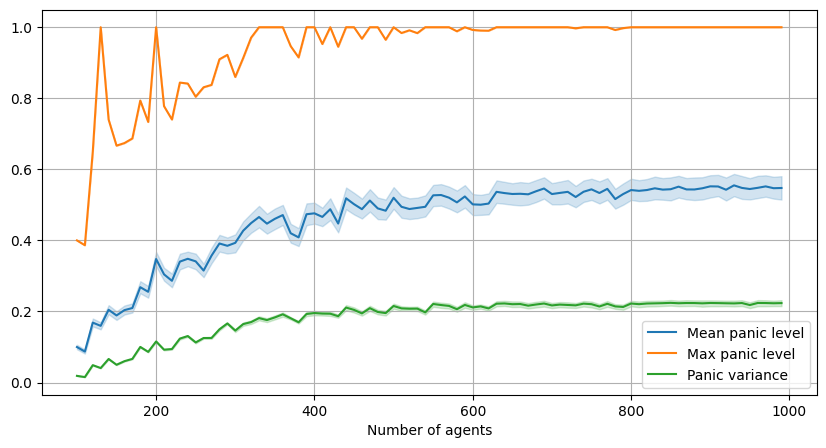

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=data, x="num_agents", y="panic_mean", label="Mean panic level")
sns.lineplot(data=data, x="num_agents", y="panic_max", label="Max panic level")
sns.lineplot(data=data, x="num_agents", y="panic_var", label="Panic variance")

ax.set_xlabel("Number of agents")
ax.set_ylabel("")

plt.grid()
plt.legend()

# Experiment 2
### Vary the max group size

#### N = 200

In [10]:
num_agents = 200
max_group_size_cv = np.arange(5, 100, 1)
max_iter = 1000
num_repetitions = 100


In [11]:
data = {
    "panic_mean": [],
    "panic_var": [],
    "panic_max": [],
    "num_agents": [],
    "max_group_size": [],
    "mean_group_size": [],
}

for max_group_size in tqdm(max_group_size_cv):

    model_params = {
        "N": num_agents,
        "width": 10,
        "height": 10,
        "min_group_size": 1,
        "max_group_size": max_group_size,
        "resilience": 3,
        "min_radius": 0.5,
    }

    model = PanicModel(**model_params)


    for j in range(num_repetitions):
        for i in range(max_iter):
            model.step()

            if not len(model.schedule.agents):
                break

        # collect data
        model_data = model.datacollector.get_model_vars_dataframe()
    
        data["panic_mean"].append(model_data.panic.mean())
        data["panic_var"].append(model_data.panic.var())
        data["panic_max"].append(model_data.panic.max())
        data["num_agents"].append(num_agents)
        data["max_group_size"].append(max_group_size)
        data["mean_group_size"].append(
            np.mean([len(group) for group in model.friend_groups])
        )


  0%|          | 0/95 [00:00<?, ?it/s]

In [12]:
data = pd.DataFrame(data)

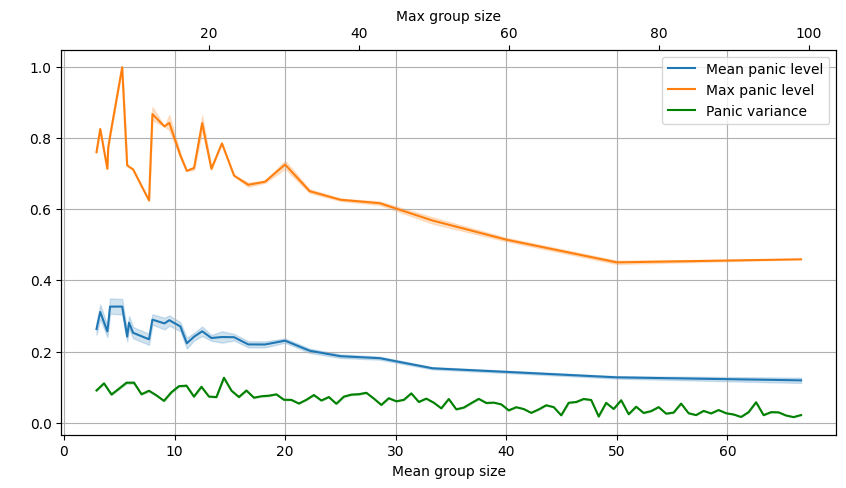

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))


ax.grid(True)
ax.set_xlabel("Mean group size")
ax.set_ylabel(" ")

ax_top = ax.twiny()
ax_top.set_xlabel("Max group size")


sns.lineplot(data=data, x="mean_group_size", y="panic_mean", ax=ax, label="Mean panic level")
sns.lineplot(data=data, x="mean_group_size", y="panic_max", ax=ax, label="Max panic level")
sns.lineplot(data=data, x="max_group_size", y="panic_var", color="green", ax=ax_top, label="Panic variance")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax_top.get_legend_handles_labels()
ax_top.legend(lines + lines2, labels + labels2, loc=0)
ax.get_legend().remove()

plt.show()

#### N = 600

In [14]:
num_agents = 600
max_group_size_cv = np.arange(5, 100, 1)
max_iter = 1000
num_repetitions = 100


In [15]:
data = {
    "panic_mean": [],
    "panic_var": [],
    "panic_max": [],
    "num_agents": [],
    "max_group_size": [],
    "mean_group_size": [],
}

for max_group_size in tqdm(max_group_size_cv):

    model_params = {
        "N": num_agents,
        "width": 10,
        "height": 10,
        "min_group_size": 1,
        "max_group_size": max_group_size,
        "resilience": 3,
        "min_radius": 0.5,
    }

    model = PanicModel(**model_params)


    for j in range(num_repetitions):
        for i in range(max_iter):
            model.step()

            if not len(model.schedule.agents):
                break

        # collect data
        model_data = model.datacollector.get_model_vars_dataframe()
    
        data["panic_mean"].append(model_data.panic.mean())
        data["panic_var"].append(model_data.panic.var())
        data["panic_max"].append(model_data.panic.max())
        data["num_agents"].append(num_agents)
        data["max_group_size"].append(max_group_size)
        data["mean_group_size"].append(
            np.mean([len(group) for group in model.friend_groups])
        )


  0%|          | 0/95 [00:00<?, ?it/s]

In [16]:
data = pd.DataFrame(data)

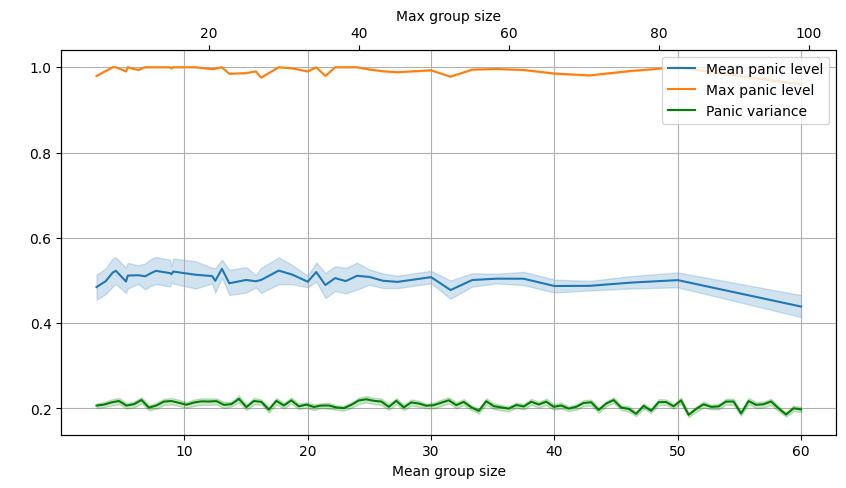

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))


ax.grid(True)
ax.set_xlabel("Mean group size")
ax.set_ylabel(" ")

ax_top = ax.twiny()
ax_top.set_xlabel("Max group size")


sns.lineplot(data=data, x="mean_group_size", y="panic_mean", ax=ax, label="Mean panic level")
sns.lineplot(data=data, x="mean_group_size", y="panic_max", ax=ax, label="Max panic level")
sns.lineplot(data=data, x="max_group_size", y="panic_var", color="green", ax=ax_top, label="Panic variance")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax_top.get_legend_handles_labels()
ax_top.legend(lines + lines2, labels + labels2, loc=0)
ax.get_legend().remove()

plt.show()

# Experiment 3
### Vary the min group size

In [18]:
num_agents = 600
min_group_size_cv = np.arange(1, 30, 1)
max_group_size = 30
max_iter = 1000
num_repetitions = 100


In [19]:
data = {
    "panic_mean": [],
    "panic_var": [],
    "panic_max": [],
    "num_agents": [],
    "min_group_size": [],
    "mean_group_size": [],
}

for min_group_size in tqdm(min_group_size_cv):

    model_params = {
        "N": num_agents,
        "width": 10,
        "height": 10,
        "min_group_size": min_group_size,
        "max_group_size": max_group_size,
        "resilience": 3,
        "min_radius": 0.5,
    }

    model = PanicModel(**model_params)


    for j in range(num_repetitions):
        for i in range(max_iter):
            model.step()

            if not len(model.schedule.agents):
                break

        # collect data
        model_data = model.datacollector.get_model_vars_dataframe()
    
        data["panic_mean"].append(model_data.panic.mean())
        data["panic_var"].append(model_data.panic.var())
        data["panic_max"].append(model_data.panic.max())
        data["num_agents"].append(num_agents)
        data["min_group_size"].append(min_group_size)
        data["mean_group_size"].append(
            np.mean([len(group) for group in model.friend_groups])
        )


  0%|          | 0/29 [00:00<?, ?it/s]

In [20]:
data = pd.DataFrame(data)

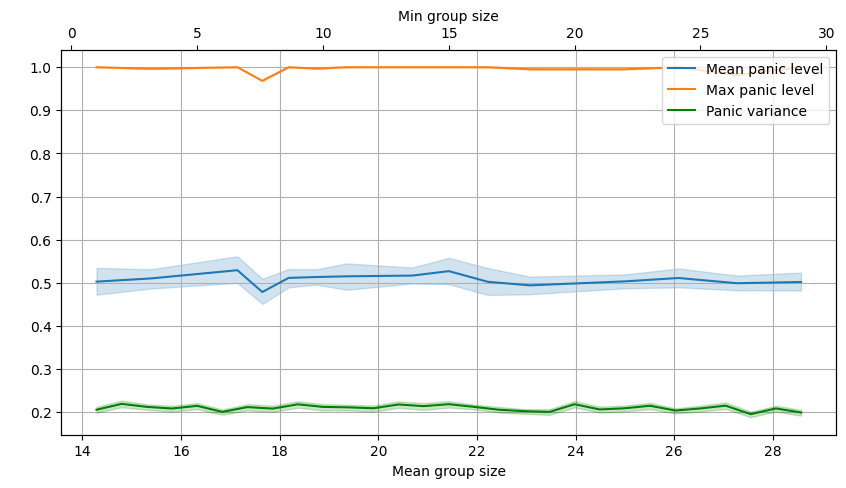

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))


ax.grid(True)
ax.set_xlabel("Mean group size")
ax.set_ylabel(" ")

ax_top = ax.twiny()
ax_top.set_xlabel("Min group size")


sns.lineplot(data=data, x="mean_group_size", y="panic_mean", ax=ax, label="Mean panic level")
sns.lineplot(data=data, x="mean_group_size", y="panic_max", ax=ax, label="Max panic level")
sns.lineplot(data=data, x="min_group_size", y="panic_var", color="green", ax=ax_top, label="Panic variance")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax_top.get_legend_handles_labels()
ax_top.legend(lines + lines2, labels + labels2, loc=0)
ax.get_legend().remove()

plt.show()

# Vary radius & step size

In [22]:
num_agents = 200
min_group_size = 1
max_group_size = 5
max_iter = 1000
num_repetitions = 100
min_velocity_cv = np.arange(0, 2, 0.1)


In [23]:
data = {
    "panic_mean": [],
    "panic_var": [],
    "panic_max": [],
    "num_agents": [],
    "min_group_size": [],
    "mean_group_size": [],
    "min_velocity": [],
}

for min_velocity in tqdm(min_velocity_cv):

    model_params = {
        "N": num_agents,
        "width": 10,
        "height": 10,
        "min_group_size": min_group_size,
        "max_group_size": max_group_size,
        "resilience": 3,
        "min_radius": 0.5,
    }

    model = PanicModel(**model_params)


    for j in range(num_repetitions):
        for i in range(max_iter):
            model.step()

            if not len(model.schedule.agents):
                break

        # collect data
        model_data = model.datacollector.get_model_vars_dataframe()
    
        data["panic_mean"].append(model_data.panic.mean())
        data["panic_var"].append(model_data.panic.var())
        data["panic_max"].append(model_data.panic.max())
        data["num_agents"].append(num_agents)
        data["min_group_size"].append(min_group_size)
        data["mean_group_size"].append(
            np.mean([len(group) for group in model.friend_groups])
        )
        data["min_velocity"].append(min_velocity)


  0%|          | 0/20 [00:00<?, ?it/s]

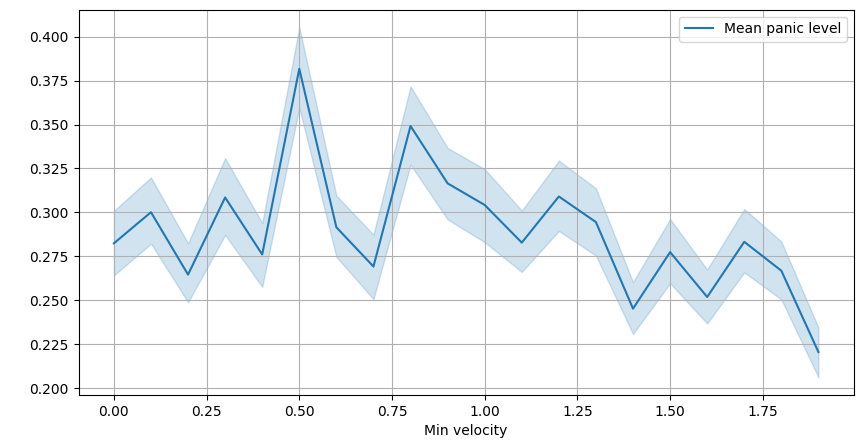

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))


ax.grid(True)
ax.set_xlabel("Min velocity")
ax.set_ylabel(" ")

# ax_top = ax.twiny()
# ax_top.set_xlabel("Min group size")


sns.lineplot(data=data, x="min_velocity", y="panic_mean", ax=ax, label="Mean panic level")
# sns.lineplot(data=data, x="mean_velocity", y="panic_max", ax=ax, label="Max panic level")
# sns.lineplot(data=data, x="min_group_size", y="panic_var", color="green", ax=ax_top, label="Panic variance")

# lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax_top.get_legend_handles_labels()
# ax_top.legend(lines + lines2, labels + labels2, loc=0)
# ax.get_legend().remove()

plt.show()

# Compare group structure

In [25]:
model_params = {
        "N": 400,
        "width": 10,
        "height": 10,
        "min_group_size": 1,
        "max_group_size": 20,
        "resilience": 3,
        "min_radius": 0.5,
    }

model = PanicModel(**model_params)


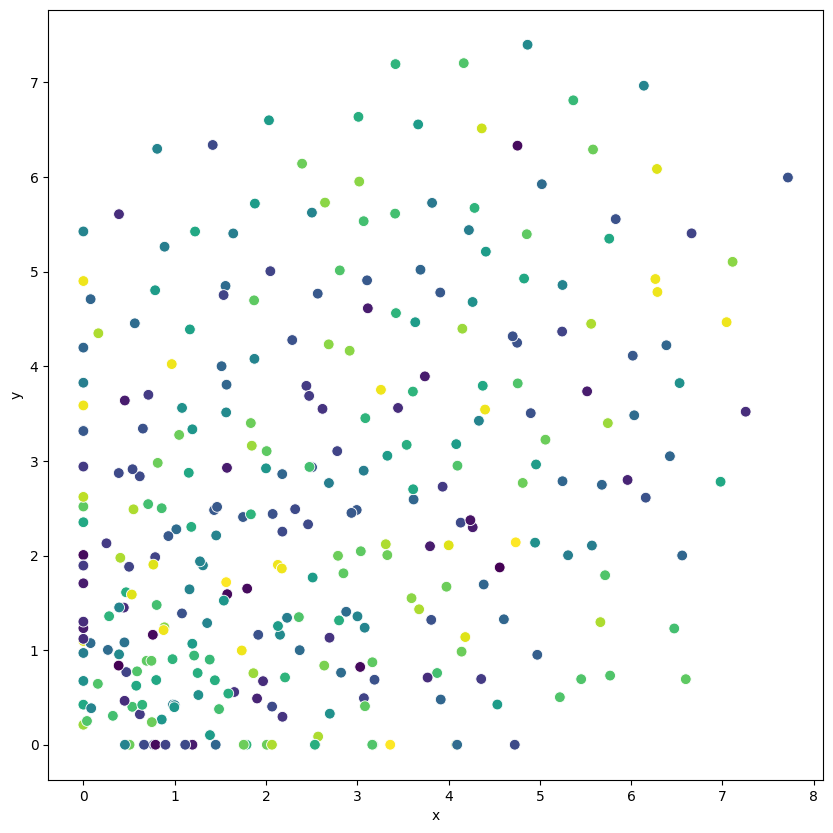

In [26]:
for i in range(15):
    model.step()

data = {
    "x": [],
    "y": [],
    "color": [],
}

for agent in model.schedule.agents:
        
    data["x"].append(agent.pos[0])
    data["y"].append(agent.pos[1])
    data["color"].append(agent.group_number)

data = pd.DataFrame.from_dict(data)


fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=data, x="x", y="y", c=data["color"], s=60)

plt.show()

In [27]:
np.mean([len(group) for group in model.friend_groups])

9.75609756097561